<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,77.104368,95.344243,96.711292,34.748496,-0.056351,313.852048,313.830746,0.021302
1,0.0,1.0,61.974876,66.027089,46.085011,55.359006,-0.060798,239.385183,239.443020,-0.057837
2,0.0,2.0,78.550711,50.531736,21.204826,79.831615,0.025853,240.144741,240.097770,0.046971
3,0.0,3.0,45.281189,72.914166,38.164447,93.248069,0.139668,259.747539,259.590108,0.157431
4,0.0,4.0,29.273083,92.670326,25.622563,72.136751,-0.050286,229.652437,229.684020,-0.031583
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,58.084566,34.234395,56.140402,74.326095,0.048560,232.834018,232.779188,0.054829
19996,999.0,16.0,61.599833,39.631551,73.379555,21.797956,-0.193441,206.215454,206.389502,-0.174048
19997,999.0,17.0,90.517280,33.340421,44.605897,60.531574,-0.138646,238.856525,238.956507,-0.099982
19998,999.0,18.0,77.514956,27.410807,38.098862,42.939218,0.035151,195.998994,195.954790,0.044205


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    77.104368  95.344243  96.711292  34.748496 -0.056351  313.852048   
      1.0    61.974876  66.027089  46.085011  55.359006 -0.060798  239.385183   
      2.0    78.550711  50.531736  21.204826  79.831615  0.025853  240.144741   
      3.0    45.281189  72.914166  38.164447  93.248069  0.139668  259.747539   
      4.0    29.273083  92.670326  25.622563  72.136751 -0.050286  229.652437   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   58.084566  34.234395  56.140402  74.326095  0.048560  232.834018   
      16.0   61.599833  39.631551  73.379555  21.797956 -0.193441  206.215454   
      17.0   90.517280  33.340421  44.605897  60.531574 -0.138646  238.856525   
      18.0   77.514956  27.410807  38.098862  42.939218  0.035151  195.998994   
      19.0   81.226570  80.058545  93.338304  38.936820 -0.018730  303.541510   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    313.830746  0.021302  
      1.0    239.443020 -0.057837  
      2.0    240.097770  0.046971  
      3.0    259.590108  0.157431  
      4.0    229.684020 -0.031583  
...                 ...       ...  
999.0 15.0   232.779188  0.054829  
      16.0   206.389502 -0.174048  
      17.0   238.956507 -0.099982  
      18.0   195.954790  0.044205  
      19.0   303.473117  0.068393  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    77.104368  95.344243  96.711292  34.748496 -0.056351  313.852048   
      1.0    61.974876  66.027089  46.085011  55.359006 -0.060798  239.385183   
      2.0    78.550711  50.531736  21.204826  79.831615  0.025853  240.144741   
      3.0    45.281189  72.914166  38.164447  93.248069  0.139668  259.747539   
      4.0    29.273083  92.670326  25.622563  72.136751 -0.050286  229.652437   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   58.084566  34.234395  56.140402  74.326095  0.048560  232.834018   
      16.0   61.599833  39.631551  73.379555  21.797956 -0.193441  206.215454   
      17.0   90.517280  33.340421  44.605897  60.531574 -0.138646  238.856525   
      18.0   77.514956  27.410807  38.098862  42.939218  0.035151  195.998994   
      19.0   81.226570  80.058545  93.338304  38.936820 -0.018730  303.541510   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    313.830746  0.021302  
      1.0    239.443020 -0.057837  
      2.0    240.097770  0.046971  
      3.0    259.590108  0.157431  
      4.0    229.684020 -0.031583  
...                 ...       ...  
999.0 15.0   232.779188  0.054829  
      16.0   206.389502 -0.174048  
      17.0   238.956507 -0.099982  
      18.0   195.954790  0.044205  
      19.0   303.473117  0.068393  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,77.104368,95.344243,96.711292,34.748496,-0.056351,313.852048,313.830746,0.021302
1,0.0,1.0,61.974876,66.027089,46.085011,55.359006,-0.060798,239.385183,239.443020,-0.057837
2,0.0,2.0,78.550711,50.531736,21.204826,79.831615,0.025853,240.144741,240.097770,0.046971
3,0.0,3.0,45.281189,72.914166,38.164447,93.248069,0.139668,259.747539,259.590108,0.157431
4,0.0,4.0,29.273083,92.670326,25.622563,72.136751,-0.050286,229.652437,229.684020,-0.031583
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,58.084566,34.234395,56.140402,74.326095,0.048560,232.834018,232.779188,0.054829
19996,999.0,16.0,61.599833,39.631551,73.379555,21.797956,-0.193441,206.215454,206.389502,-0.174048
19997,999.0,17.0,90.517280,33.340421,44.605897,60.531574,-0.138646,238.856525,238.956507,-0.099982
19998,999.0,18.0,77.514956,27.410807,38.098862,42.939218,0.035151,195.998994,195.954790,0.044205


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    77.104368  95.344243  96.711292  34.748496 -0.056351  313.852048   
      1.0    61.974876  66.027089  46.085011  55.359006 -0.060798  239.385183   
      2.0    78.550711  50.531736  21.204826  79.831615  0.025853  240.144741   
      3.0    45.281189  72.914166  38.164447  93.248069  0.139668  259.747539   
      4.0    29.273083  92.670326  25.622563  72.136751 -0.050286  229.652437   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   58.084566  34.234395  56.140402  74.326095  0.048560  232.834018   
      16.0   61.599833  39.631551  73.379555  21.797956 -0.193441  206.215454   
      17.0   90.517280  33.340421  44.605897  60.531574 -0.138646  238.856525   
      18.0   77.514956  27.410807  38.098862  42.939218  0.035151  195.998994   
      19.0   81.226570  80.058545  93.338304  38.936820 -0.018730  303.541510   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    313.830746  0.021302  
      1.0    239.443020 -0.057837  
      2.0    240.097770  0.046971  
      3.0    259.590108  0.157431  
      4.0    229.684020 -0.031583  
...                 ...       ...  
999.0 15.0   232.779188  0.054829  
      16.0   206.389502 -0.174048  
      17.0   238.956507 -0.099982  
      18.0   195.954790  0.044205  
      19.0   303.473117  0.068393  

[20000 rows x 8 columns]

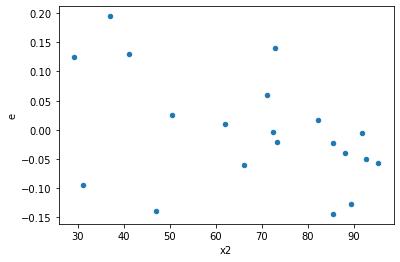

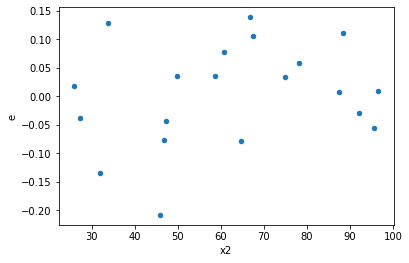

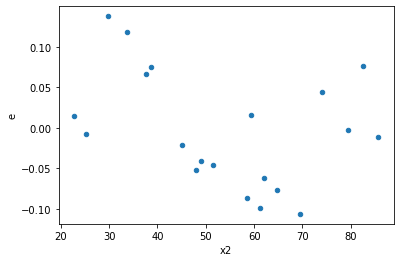

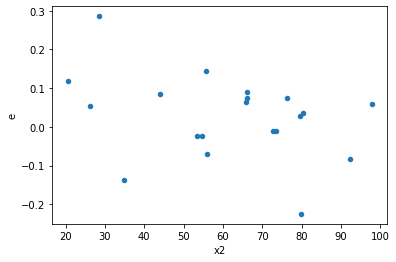

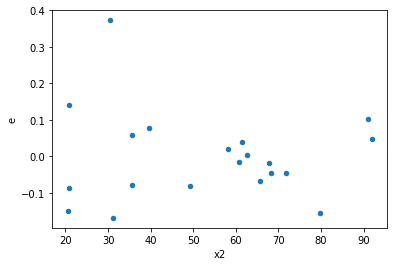

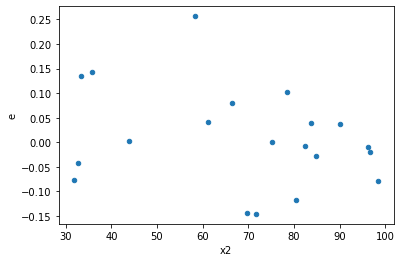

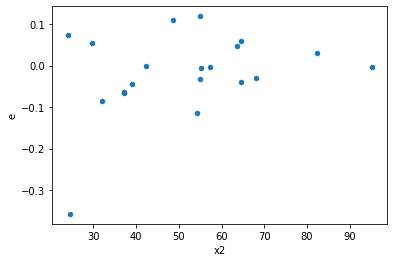

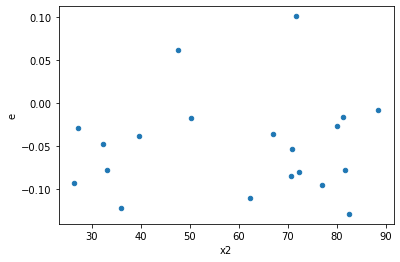

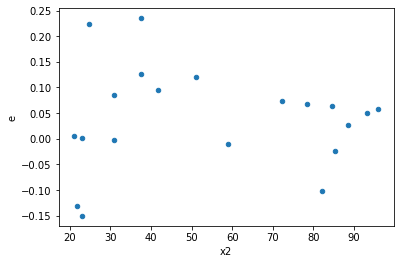

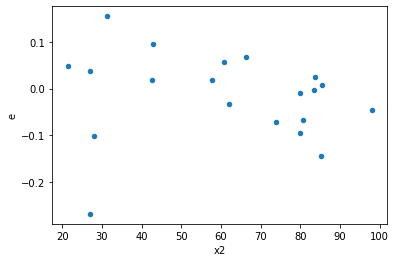

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,0.02443490447625008,0.034647629870056075,0.004072484079375014,0.0057746049783426795,1.417956428016014,0.6822944769233299,0.658852761538335,0.34114723846166495,Reject001=1 : Homoscedasticity
1.0,4.0,8.0,0.015457875241586212,0.06550840519976511,0.003864468810396553,0.008188550649970639,2.118933041441825,0.33994835646855837,0.8300258217657208,0.16997417823427918,Reject001=1 : Homoscedasticity
2.0,4.0,8.0,0.0021734460074793577,0.01786818128969721,0.0005433615018698394,0.0022335226612121514,4.110564796228763,0.08471184490471262,0.9576440775476437,0.04235592245235631,Reject001=1 : Homoscedasticity
3.0,9.0,3.0,0.0444362602919968,0.02867022723709296,0.004937362254666311,0.00955674241236432,1.9355967659314897,0.637745440559526,0.681127279720237,0.318872720279763,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.04671783198959997,0.17219308255898813,0.007786305331599995,0.028698847093164687,3.6858106471490513,0.13747533703954407,0.931262331480228,0.06873766851977203,Reject001=1 : Homoscedasticity
6.0,4.0,8.0,0.0038620526883336847,0.019098050458588575,0.0009655131720834212,0.002387256307323572,2.4725258819330853,0.25681454733629394,0.871592726331853,0.12840727366814697,Reject001=1 : Homoscedasticity
7.0,5.0,7.0,0.008234489209444288,0.018030007225913452,0.0016468978418888575,0.002575715317987636,1.5639800189631075,0.5692838388064638,0.7153580805967681,0.2846419194032319,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.02645084070885527,0.09358359916131184,0.004408473451475878,0.015597266526885306,3.5380198380606376,0.14950511170038516,0.9252474441498074,0.07475255585019258,Reject001=1 : Homoscedasticity
14.0,2.0,10.0,0.006664923304258877,0.21554106138915083,0.0033324616521294387,0.021554106138915084,6.467923231807346,0.03151056077461112,0.9842447196126944,0.01575528038730556,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.02443490447625008,0.034647629870056075,0.004072484079375014,0.0057746049783426795,1.417956428016014,0.6822944769233299,Reject001=1 : Homoscedasticity
1.0,4.0,8.0,0.015457875241586212,0.06550840519976511,0.003864468810396553,0.008188550649970639,2.118933041441825,0.33994835646855837,Reject001=1 : Homoscedasticity
2.0,4.0,8.0,0.0021734460074793577,0.01786818128969721,0.0005433615018698394,0.0022335226612121514,4.110564796228763,0.08471184490471262,Reject001=1 : Homoscedasticity
3.0,9.0,3.0,0.0444362602919968,0.02867022723709296,0.004937362254666311,0.00955674241236432,1.9355967659314897,0.637745440559526,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.04671783198959997,0.17219308255898813,0.007786305331599995,0.028698847093164687,3.6858106471490513,0.13747533703954407,Reject001=1 : Homoscedasticity
5.0,8.0,4.0,0.11709657071294156,0.002399267555964743,0.014637071339117695,0.0005998168889911858,0.04097929668404158,0.00030930425842571165,Reject001=0 : Heteroscedasticity
6.0,4.0,8.0,0.0038620526883336847,0.019098050458588575,0.0009655131720834212,0.002387256307323572,2.4725258819330853,0.25681454733629394,Reject001=1 : Homoscedasticity
7.0,5.0,7.0,0.008234489209444288,0.018030007225913452,0.0016468978418888575,0.002575715317987636,1.5639800189631075,0.5692838388064638,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.02645084070885527,0.09358359916131184,0.004408473451475878,0.015597266526885306,3.5380198380606376,0.14950511170038516,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      876
Reject001=0 : Heteroscedasticity    124
Name: Result_test, dtype: int64